In [18]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior.data_access import loading
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 500)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
%matplotlib notebook

In [5]:
versions = ['12_events_L2_optimize_by_session', '12_dff_L2_optimize_by_session']

In [19]:
datafolder = '/allen/programs/braintv/workgroups/nc-ophys/alex.piet/behavior/model_output'
ophys_summary_table = pd.read_csv(os.path.join(datafolder, '_summary_table.csv'))
behavior_summary_table = pd.read_csv(os.path.join(datafolder, '_training_summary_table.csv'))

In [22]:
ophys_summary_table.sample(5)

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,donor_id,sex,age_in_days,full_genotype,mouse_id,reporter_line,driver_line,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,session_number,active,passive,trained_A,trained_B,behavior_fit_available,num_hits,num_fa,num_cr,num_miss,num_aborts,fraction_engaged,session_roc,lick_fraction,lick_fraction_1st_half,lick_fraction_2nd_half,lick_hit_fraction,lick_hit_fraction_1st_half,lick_hit_fraction_2nd_half,trial_hit_fraction,trial_hit_fraction_1st_half,trial_hit_fraction_2nd_half,strategy_dropout_index,visual_only_dropout_index,timing_only_dropout_index,prior_bias,dropout_bias,avg_weight_bias,avg_weight_bias_1st_half,avg_weight_bias_2nd_half,prior_omissions,dropout_omissions,avg_weight_omissions,avg_weight_omissions_1st_half,avg_weight_omissions_2nd_half,weight_omissions,prior_omissions1,dropout_omissions1,avg_weight_omissions1,avg_weight_omissions1_1st_half,avg_weight_omissions1_2nd_half,prior_task0,dropout_task0,avg_weight_task0,avg_weight_task0_1st_half,avg_weight_task0_2nd_half,prior_timing1D,dropout_timing1D,avg_weight_timing1D,avg_weight_timing1D_1st_half,avg_weight_timing1D_2nd_half,strategy_weight_index,strategy_weight_index_1st_half,strategy_weight_index_2nd_half,visual_strategy_session,container_in_order,full_active_container,strategy_matched
64,852794147,852966248,848390542,VisualBehavior,published,OPHYS_3_images_A,CAM2P.4,2019-04-17 15:54:23.000000,832570530,823826986,823826963,F,95.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,447663,['Ai93(TITL-GCaMP6f)'],"['Slc17a7-IRES2-Cre', 'Camk2a-tTA']",VISp,2021-03-25 00:00:00.000000,823826986,Slc17a7-IRES2-Cre,NaN,NaN,0,14.0,2.0,3,True,False,True,False,True,135.0,9.0,27.0,124.0,327.0,0.848990,0.740170,0.123366,0.122402,0.124388,0.260116,0.279245,0.240157,0.521236,0.582677,0.462121,7.117852,-8.374472,-1.256620,0.048056,-40.447706,-2.180650,-2.221427,-2.137417,0.074972,-0.144277,-1.826785,-2.671932,-0.930731,[-3.34826463 -3.34835831 -3.34842918 ... -1.99...,0.025570,-0.253954,0.811994,1.158495,0.444620,0.001050,-8.374472,2.419215,2.420168,2.418204,0.125099,-1.256620,0.134280,0.767100,-0.536659,2.284935,1.653068,2.954863,True,False,False,True
185,1059871455,1059890582,1058209392,VisualBehaviorTask1B,published,OPHYS_3_images_B,CAM2P.4,2020-10-29 17:11:50.000000,1047947399,1043681534,1043681523,F,130.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,539518,['Ai93(TITL-GCaMP6f)'],"['Slc17a7-IRES2-Cre', 'Camk2a-tTA']",VISp,2021-03-25 00:00:00.000000,1043681534,Slc17a7-IRES2-Cre,NaN,NaN,0,11.0,2.0,3,True,False,False,True,True,108.0,3.0,41.0,198.0,161.0,0.636023,0.791285,0.066511,0.095285,0.040286,0.380282,0.381443,0.377778,0.352941,0.528571,0.204819,12.260004,-13.431457,-1.171453,0.028766,-84.338608,-3.074064,-2.545922,-3.555396,0.001826,0.396984,-0.158044,-0.160071,-0.156197,[-0.16126466 -0.16126456 -0.16126448 ... -0.15...,0.017883,-1.043625,1.308428,1.651902,0.995397,0.004785,-13.431457,2.614862,2.671951,2.562832,0.304957,-1.171453,0.209439,0.649470,-0.191592,2.405423,2.022481,2.754424,True,True,False,False
315,803223329,803341010,814797528,VisualBehavior,published,OPHYS_1_images_A,CAM2P.5,2019-01-04 16:05:15.000000,767468166,760949544,760949537,M,127.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,421136,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],VISp,2021-03-25 00:00:00.000000,760949544,Vip-IRES-Cre,NaN,NaN,1,14.0,9.0,1,True,False,True,False,True,58.0,4.0,25.0,154.0,509.0,0.827083,0.828830,0.135909,0.136748,0.135085,0.099315,0.103093,0.095563,0.273585,0.283019,0.264151,-16.781634,0.084454,-16.697180,0.113055,-36.259808,-1.871689,-1.846086,-1.896809,0.024958,0.214129,-0.058013,0.414138,-0.521239,[ 0.56701335 0.56703509 0.56705606 ... -0.87...,0.000369,0.238447,0.334835,0.334906,0.3347

<IPython.core.display.Javascript object>


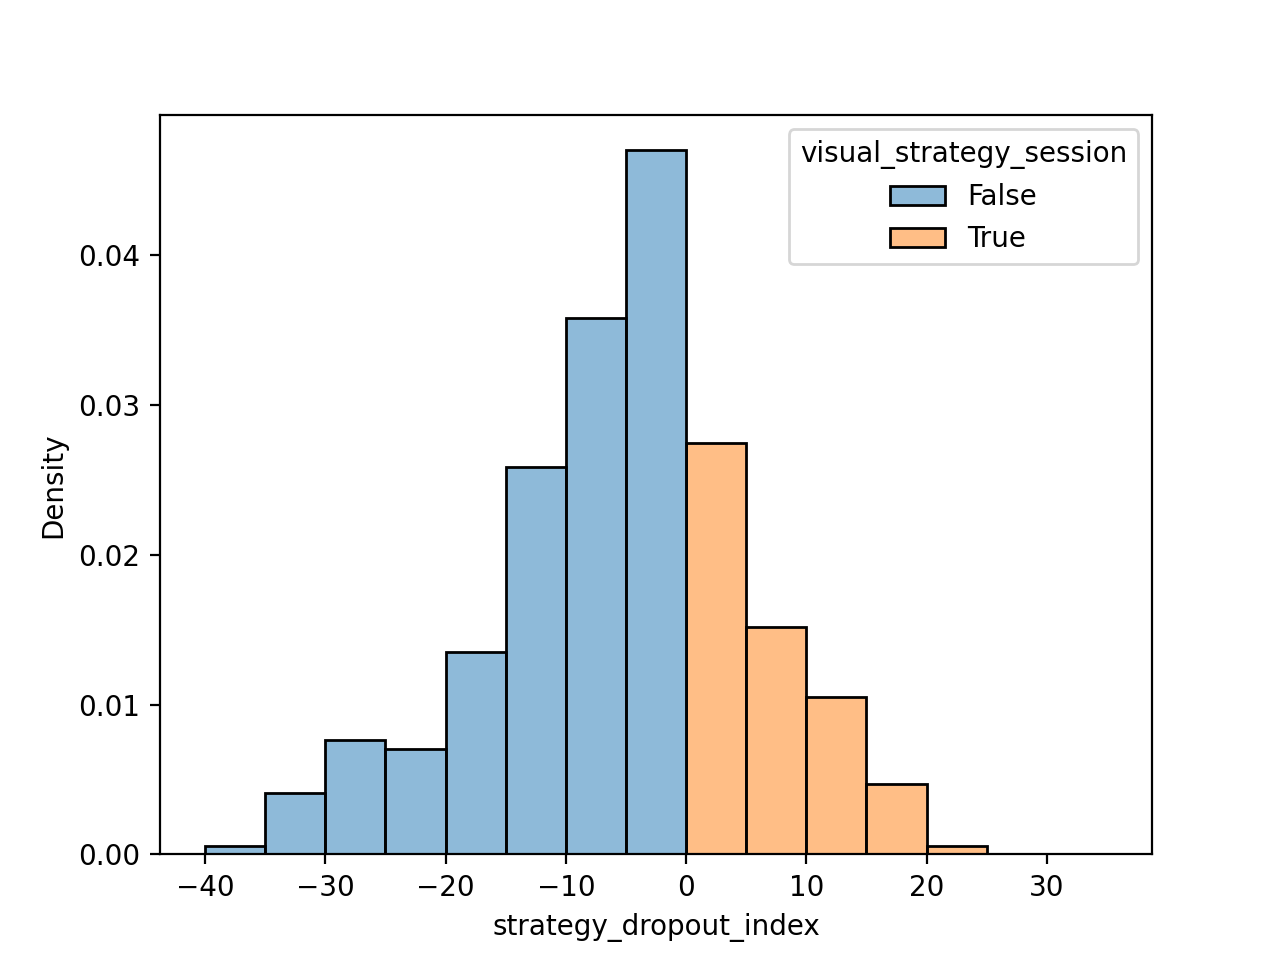

<AxesSubplot:xlabel='strategy_dropout_index', ylabel='Density'>

In [34]:
fig,ax = plt.subplots()
sns.histplot(
    data = ophys_summary_table,
    x = 'strategy_dropout_index',
    hue = 'visual_strategy_session',
    ax = ax,
    stat='density',
    bins = np.arange(-40,40,5)
)

In [25]:
cols_to_merge = [
    'ophys_session_id',
    'visual_strategy_session',
    'strategy_weight_index',
]

ophys_summary_table[cols_to_merge]

,ophys_session_id,visual_strategy_session,strategy_weight_index
0,951410079,False,0.979245
1,954954402,False,3.780645
2,955775716,False,2.563428
3,957020350,False,5.496749
4,958105827,False,1.870302
...,...,...,...
341,906968227,True,3.919867
342,908441202,True,0.396392
343,911719666,False,1.603987
344,913564409,True,1.819449


In [6]:
results = {}
for version in versions:
    results[version] = gat.retrieve_results({'glm_version':version})

In [9]:
results['12_dff_L2_optimize_by_session'].head()

,_id,cell_specimen_id,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,intercept__avg_cv_var_train,intercept__avg_cv_var_test,intercept__avg_cv_var_test_full_comparison,intercept__avg_cv_adjvar_train,intercept__avg_cv_adjvar_test,intercept__avg_cv_adjvar_test_full_comparison,intercept__absolute_change_from_full,intercept__adj_dropout,intercept__dropout,time__avg_cv_var_train,time__avg_cv_var_test,time__avg_cv_var_test_full_comparison,time__avg_cv_adjvar_train,time__avg_cv_adjvar_test,time__avg_cv_adjvar_test_full_comparison,time__absolute_change_from_full,time__adj_dropout,time__dropout,omissions__avg_cv_var_train,omissions__avg_cv_var_test,omissions__avg_cv_var_test_full_comparison,omissions__avg_cv_adjvar_train,omissions__avg_cv_adjvar_test,omissions__avg_cv_adjvar_test_full_comparison,omissions__absolute_change_from_full,omissions__adj_dropout,omissions__dropout,running__avg_cv_var_train,running__avg_cv_var_test,running__avg_cv_var_test_full_comparison,running__avg_cv_adjvar_train,running__avg_cv_adjvar_test,running__avg_cv_adjvar_test_full_comparison,running__absolute_change_from_full,running__adj_dropout,running__dropout,pupil__avg_cv_var_train,pupil__avg_cv_var_test,pupil__avg_cv_var_test_full_comparison,pupil__avg_cv_adjvar_train,pupil__avg_cv_adjvar_test,pupil__avg_cv_adjvar_test_full_comparison,pupil__absolute_change_from_full,pupil__adj_dropout,pupil__dropout,face_motion_PC_0__avg_cv_var_train,face_motion_PC_0__avg_cv_var_test,face_motion_PC_0__avg_cv_var_test_full_comparison,face_motion_PC_0__avg_cv_adjvar_train,face_motion_PC_0__avg_cv_adjvar_test,face_motion_PC_0__avg_cv_adjvar_test_full_comparison,face_motion_PC_0__absolute_change_from_full,face_motion_PC_0__adj_dropout,face_motion_PC_0__dropout,face_motion_PC_1__avg_cv_var_train,face_motion_PC_1__avg_cv_var_test,face_motion_PC_1__avg_cv_var_test_full_comparison,face_motion_PC_1__avg_cv_adjvar_train,face_motion_PC_1__avg_cv_adjvar_test,face_motion_PC_1__avg_cv_adjvar_test_full_comparison,face_motion_PC_1__absolute_change_from_full,face_motion_PC_1__adj_dropout,face_motion_PC_1__dropout,face_motion_PC_2__avg_cv_var_train,face_motion_PC_2__avg_cv_var_test,face_motion_PC_2__avg_cv_var_test_full_comparison,face_motion_PC_2__avg_cv_adjvar_train,face_motion_PC_2__avg_cv_adjvar_test,face_motion_PC_2__avg_cv_adjvar_test_full_comparison,face_motion_PC_2__absolute_change_from_full,face_motion_PC_2__adj_dropout,face_motion_PC_2__dropout,face_motion_PC_3__avg_cv_var_train,face_motion_PC_3__avg_cv_var_test,face_motion_PC_3__avg_cv_var_test_full_comparison,face_motion_PC_3__avg_cv_adjvar_train,face_motion_PC_3__avg_cv_adjvar_test,face_motion_PC_3__avg_cv_adjvar_test_full_comparison,face_motion_PC_3__absolute_change_from_full,face_motion_PC_3__adj_dropout,face_motion_PC_3__dropout,face_motion_PC_4__avg_cv_var_train,face_motion_PC_4__avg_cv_var_test,face_motion_PC_4__avg_cv_var_test_full_comparison,face_motion_PC_4__avg_cv_adjvar_train,face_motion_PC_4__avg_cv_adjvar_test,face_motion_PC_4__avg_cv_adjvar_test_full_comparison,face_motion_PC_4__absolute_change_from_full,face_motion_PC_4__adj_dropout,face_motion_PC_4__dropout,image0__avg_cv_var_train,image0__avg_cv_var_test,image0__avg_cv_var_test_full_comparison,image0__avg_cv_adjvar_train,image0__avg_cv_adjvar_test,image0__avg_cv_adjvar_test_full_comparison,image0__absolute_change_from_full,image0__adj_dropout,image0__dropout,image1__avg_cv_var_train,image1__avg_cv_var_test,image1__avg_cv_var_test_full_comparison,image1__avg_cv_adjvar_train,image1__avg_cv_adjvar_test,image1__avg_cv_adjvar_test_full_comparison,image1__absolute_change_from_full,image1__adj_dropout,image1__dropout,image2__avg_cv_var_train,image2__avg_cv_var_test,image2__avg_cv_var_test_full_comparison,image2__avg_cv_adjvar_train,image2__avg_cv_adjvar_test,image2__avg_cv_adjvar_tes

In [26]:
results['12_dff_L2_optimize_by_session'].merge(
    ophys_summary_table[cols_to_merge],
    left_on = 'ophys_session_id',
    right_on = 'ophys_session_id'
)

,_id,cell_specimen_id,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,intercept__avg_cv_var_train,intercept__avg_cv_var_test,intercept__avg_cv_var_test_full_comparison,intercept__avg_cv_adjvar_train,intercept__avg_cv_adjvar_test,intercept__avg_cv_adjvar_test_full_comparison,intercept__absolute_change_from_full,intercept__adj_dropout,intercept__dropout,time__avg_cv_var_train,time__avg_cv_var_test,time__avg_cv_var_test_full_comparison,time__avg_cv_adjvar_train,time__avg_cv_adjvar_test,time__avg_cv_adjvar_test_full_comparison,time__absolute_change_from_full,time__adj_dropout,time__dropout,omissions__avg_cv_var_train,omissions__avg_cv_var_test,omissions__avg_cv_var_test_full_comparison,omissions__avg_cv_adjvar_train,omissions__avg_cv_adjvar_test,omissions__avg_cv_adjvar_test_full_comparison,omissions__absolute_change_from_full,omissions__adj_dropout,omissions__dropout,running__avg_cv_var_train,running__avg_cv_var_test,running__avg_cv_var_test_full_comparison,running__avg_cv_adjvar_train,running__avg_cv_adjvar_test,running__avg_cv_adjvar_test_full_comparison,running__absolute_change_from_full,running__adj_dropout,running__dropout,pupil__avg_cv_var_train,pupil__avg_cv_var_test,pupil__avg_cv_var_test_full_comparison,pupil__avg_cv_adjvar_train,pupil__avg_cv_adjvar_test,pupil__avg_cv_adjvar_test_full_comparison,pupil__absolute_change_from_full,pupil__adj_dropout,pupil__dropout,face_motion_PC_0__avg_cv_var_train,face_motion_PC_0__avg_cv_var_test,face_motion_PC_0__avg_cv_var_test_full_comparison,face_motion_PC_0__avg_cv_adjvar_train,face_motion_PC_0__avg_cv_adjvar_test,face_motion_PC_0__avg_cv_adjvar_test_full_comparison,face_motion_PC_0__absolute_change_from_full,face_motion_PC_0__adj_dropout,face_motion_PC_0__dropout,face_motion_PC_1__avg_cv_var_train,face_motion_PC_1__avg_cv_var_test,face_motion_PC_1__avg_cv_var_test_full_comparison,face_motion_PC_1__avg_cv_adjvar_train,face_motion_PC_1__avg_cv_adjvar_test,face_motion_PC_1__avg_cv_adjvar_test_full_comparison,face_motion_PC_1__absolute_change_from_full,face_motion_PC_1__adj_dropout,face_motion_PC_1__dropout,face_motion_PC_2__avg_cv_var_train,face_motion_PC_2__avg_cv_var_test,face_motion_PC_2__avg_cv_var_test_full_comparison,face_motion_PC_2__avg_cv_adjvar_train,face_motion_PC_2__avg_cv_adjvar_test,face_motion_PC_2__avg_cv_adjvar_test_full_comparison,face_motion_PC_2__absolute_change_from_full,face_motion_PC_2__adj_dropout,face_motion_PC_2__dropout,face_motion_PC_3__avg_cv_var_train,face_motion_PC_3__avg_cv_var_test,face_motion_PC_3__avg_cv_var_test_full_comparison,face_motion_PC_3__avg_cv_adjvar_train,face_motion_PC_3__avg_cv_adjvar_test,face_motion_PC_3__avg_cv_adjvar_test_full_comparison,face_motion_PC_3__absolute_change_from_full,face_motion_PC_3__adj_dropout,face_motion_PC_3__dropout,face_motion_PC_4__avg_cv_var_train,face_motion_PC_4__avg_cv_var_test,face_motion_PC_4__avg_cv_var_test_full_comparison,face_motion_PC_4__avg_cv_adjvar_train,face_motion_PC_4__avg_cv_adjvar_test,face_motion_PC_4__avg_cv_adjvar_test_full_comparison,face_motion_PC_4__absolute_change_from_full,face_motion_PC_4__adj_dropout,face_motion_PC_4__dropout,image0__avg_cv_var_train,image0__avg_cv_var_test,image0__avg_cv_var_test_full_comparison,image0__avg_cv_adjvar_train,image0__avg_cv_adjvar_test,image0__avg_cv_adjvar_test_full_comparison,image0__absolute_change_from_full,image0__adj_dropout,image0__dropout,image1__avg_cv_var_train,image1__avg_cv_var_test,image1__avg_cv_var_test_full_comparison,image1__avg_cv_adjvar_train,image1__avg_cv_adjvar_test,image1__avg_cv_adjvar_test_full_comparison,image1__absolute_change_from_full,image1__adj_dropout,image1__dropout,image2__avg_cv_var_train,image2__avg_cv_var_test,image2__avg_cv_var_test_full_comparison,image2__avg_cv_adjvar_train,image2__avg_cv_adjvar_test,image2__avg_cv_adjvar_tes

In [15]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
gvt.compare_var_explained(
    results=results['12_dff_L2_optimize_by_session'], 
    fig=fig, 
    ax=ax, 
    figsize=(15,12), 
    outlier_threshold=1.5
)

<IPython.core.display.Javascript object>

ValueError: Could not interpret input 'Full_avg_cv_var_train'